In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


In [2]:
datasig=pd.read_csv("sig_many_values.csv")
databkg=pd.read_csv("bkg_many_values.csv")

In [3]:
datasig.shape

(67263, 34)

In [4]:
databkg.shape

(84499, 34)

In [5]:
datasig["label"]=1
databkg["label"]=0

In [6]:
data2=datasig.append(databkg,ignore_index=True)

In [7]:
data2.shape


(151762, 35)

In [8]:
data2.head()

,jetPt_1,jetEta_1,jetPhi_1,jetE_1,btag_1,jetPt_2,jetEta_2,jetPhi_2,jetE_2,btag_2,...,jetPt_6,jetEta_6,jetPhi_6,jetE_6,btag_6,diPhoPhi,diPhoEta,diPhoPtoM,weight,label
0,179.1340,0.129419,-0.770991,184.053,0.920134,75.2335,-0.047224,-1.281490,76.1059,0.999764,...,37.2568,-0.299217,-1.762450,39.8590,0.032036,1.47030,0.659044,1.629320,0.000071,1
1,161.2780,1.071580,-0.156882,263.612,0.913174,126.8670,0.646219,2.747790,155.3490,0.999908,...,30.6574,1.363930,-0.648138,64.0560,0.032292,-3.10210,1.074770,0.598067,0.000073,1
2,157.1970,-0.333851,0.212655,166.653,0.005083,68.6658,-1.467650,0.122107,157.2250,0.999957,...,50.2075,-0.554880,3.135870,58.4124,0.956340,2.64547,-0.449345,1.746590,0.000053,1
3,143.9920,-0.899087,-0.825905,206.971,0.993589,112.7960,0.119058,0.629660,114.7540,0.132374,...,30.1873,-0.606200,0.356470,36.3707,0.217502,2.49579,-0.719844,2.053300,0.000010,1
4,85.5433,0.699251,-2.586590,108.438,0.999996,74.1270,0.099549,-0.422806,75.8854,0.054680,...,33.7513,-1.301440,2.364960,66.7972,0.059545,2.53021,-1.809120,0.284786,0.000089,1


In [9]:
X=data2.iloc[:,:-2]
Y=data2.iloc[:,-1]
weights=data2.iloc[:,-2]

In [10]:
X_train, X_test, y_train, y_test,weight_train,weight_test = train_test_split(X, Y,weights, test_size=0.3, random_state=7)

In [11]:
X_train=np.asarray(X_train).astype('float32')
X_test=np.asarray(X_test).astype('float32')
y_train=np.asarray(y_train).astype('float32')
y_test=np.asarray(y_test).astype('float32')
weight_train=weight_train
weight_test=weight_test
weight_test=np.asarray(weight_test).astype("float32")
weight_train=np.asarray(weight_train).astype("float32")


In [12]:
weight_train

array([5.01296e-07, 7.53136e-05, 4.80751e-05, ..., 7.04554e-05,
       4.63276e-06, 7.76872e-05], dtype=float32)

In [13]:
ndim=X.shape[1]

In [14]:
from keras import models
from keras import layers
from keras import optimizers

Using TensorFlow backend.


In [15]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(ndim,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(X_train,y_train, epochs=40,batch_size=512,validation_data=(X_test, y_test,weight_test),sample_weight=weight_train)

Instructions for updating:
Use tf.cast instead.
Train on 106233 samples, validate on 45529 samples
Epoch 1/40
106233/106233 [==============================] - 0s 4us/step - loss: 9.4728e-05 - acc: 0.5190 - val_loss: 6.5674e-05 - val_acc: 0.5012
Epoch 2/40
106233/106233 [==============================] - 0s 2us/step - loss: 6.3614e-05 - acc: 0.5242 - val_loss: 6.4328e-05 - val_acc: 0.5472
Epoch 3/40
106233/106233 [==============================] - 0s 2us/step - loss: 5.8076e-05 - acc: 0.5299 - val_loss: 6.7377e-05 - val_acc: 0.5563
Epoch 4/40
106233/106233 [==============================] - 0s 2us/step - loss: 5.5075e-05 - acc: 0.5314 - val_loss: 5.3023e-05 - val_acc: 0.5118
Epoch 5/40
106233/106233 [==============================] - 0s 2us/step - loss: 5.2394e-05 - acc: 0.5410 - val_loss: 5.1509e-05 - val_acc: 0.5227
Epoch 6/40
106233/106233 [==============================] - 0s 2us/step - loss: 5.0868e-05 - acc: 0.5447 - val_loss: 5.1218e-05 - val_acc: 0.5640
Epoch 7/40
106233/106233 

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

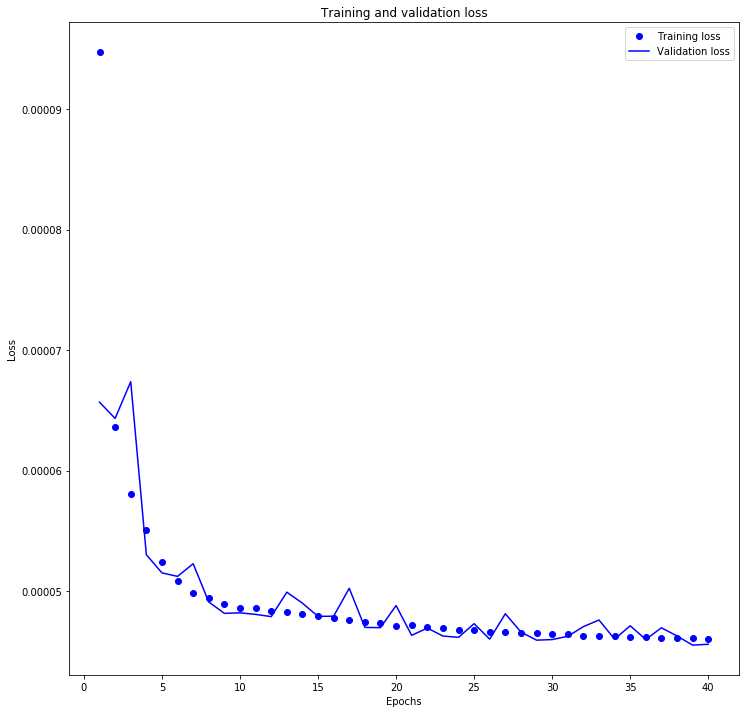

In [34]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

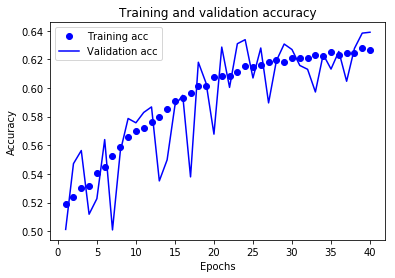

In [20]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
results = model.evaluate(X_test, y_test,sample_weight=weight_test)
results

45529/45529 [==============================] - 0s 7us/step


[4.558465692729397e-05, 0.6389553910733557]

In [22]:
probs=model.predict(X_test)

In [23]:
from sklearn.metrics import roc_curve
y_pred_keras= model.predict_proba(X_test)
# keep probabilities for the positive outcome only
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras,sample_weight=weight_test)

In [24]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
print(auc_keras)


0.6754536706684606


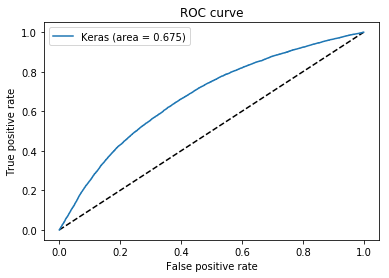

In [25]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

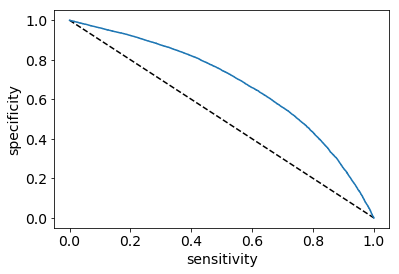

In [26]:
plt.figure(2)
plt.plot([0, 1], [1, 0], 'k--')
plt.plot(tpr_keras, 1-fpr_keras, label='Keras:DNN')
plt.xlabel("sensitivity",fontsize=14)
plt.ylabel("specificity",fontsize=14)
plt.tick_params(axis="both",labelsize=14)
plt.show()

In [27]:
filename="keras_tth.CSV"
with open(filename,"w") as file:
    for kk in range(tpr_keras.size):
        file.write(str(fpr_keras[kk]))
        file.write(" ")
        file.write(str(tpr_keras[kk]))
        file.write("\n")

In [28]:
tpr_keras.size

45426

In [29]:
X_test.shape

(45529, 33)

In [30]:
sig_probs=[]
bkg_probs=[]
for index in range(y_test.shape[0]):
    if(y_test[index]==1.0):
        sig_probs.append(probs[index][0])
    else:
        bkg_probs.append(probs[index][0])
    

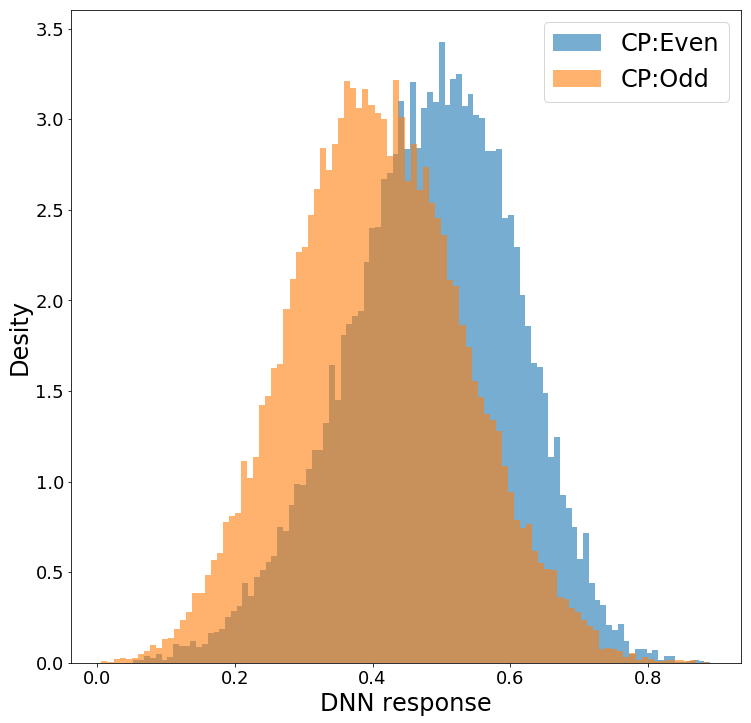

In [33]:
plt.figure(3)
plt.rcParams['figure.figsize'] = [12, 12]

plt.hist(sig_probs,bins=100,density=True,alpha=0.6,label="CP:Even");
plt.hist(bkg_probs,bins=100,density=True,alpha=0.6,label="CP:Odd");
plt.legend(loc='upper right',fontsize=24)
plt.xlabel("DNN response",fontsize=24)
plt.ylabel("Desity",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('tth_keras_output.png')
plt.show()

In [32]:
thresholds_keras

array([1.8896784 , 0.88967836, 0.88712996, ..., 0.0178951 , 0.01419544,
       0.00652328], dtype=float32)